In [4]:
import os.path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
ds = pd.read_csv("C:/Users/Homka/Desktop/variant_4.csv")

In [19]:
print('columns count - ',len(ds.columns), '\n')
print('columns: ',list(ds.columns))

columns count -  43 

columns:  ['Unnamed: 0', 'Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 

In [10]:
print('Samples count: ',ds.shape[0])

Samples count:  4424


In [11]:
display(ds.head(5))

,Unnamed: 0,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Citizenship,Family Position,Attendance,Field of Study,Special Needs
0,0,1,17,5,171.0,1.0,1.0,122.0,1,19,...,0,10.8,1.4,1.74,Dropout,Budapest,Youngest Child,Online,Science,Special Needs
1,1,1,15,1,9254.0,1.0,1.0,NaN,1,1,...,0,13.9,-0.3,0.79,Graduate,Oslo,NaN,Full-Time,Arts,NaN
2,2,1,1,5,9070.0,1.0,1.0,NaN,1,37,...,0,10.8,1.4,1.74,Dropout,Edinburgh,NaN,Part-Time,Commerce,NaN
3,3,1,17,2,9773.0,1.0,1.0,122.0,1,38,...,0,9.4,-0.8,-3.12,Graduate,Budapest,Middle Child,Part-Time,Commerce,No Special Needs
4,4,2,39,1,8014.0,0.0,1.0,100.0,1,37,...,0,13.9,-0.3,0.79,Graduate,London,Youngest Child,Part-Time,Commerce,No Special Needs


In [12]:
print("Any missing sample in training set:",ds.isnull().values.any())


Any missing sample in training set: True


In [13]:
for col in ds.columns:
    if ds[col].isnull().values.any():
        print("Missing data in ", col)

Missing data in  Course
Missing data in  Daytime/evening attendance	
Missing data in  Previous qualification
Missing data in  Previous qualification (grade)
Missing data in  Mother's occupation
Missing data in  Father's occupation
Missing data in  International
Missing data in  Curricular units 1st sem (enrolled)
Missing data in  Curricular units 1st sem (approved)
Missing data in  Curricular units 1st sem (grade)
Missing data in  Curricular units 1st sem (without evaluations)
Missing data in  Curricular units 2nd sem (credited)
Missing data in  Curricular units 2nd sem (enrolled)
Missing data in  Curricular units 2nd sem (evaluations)
Missing data in  Curricular units 2nd sem (grade)
Missing data in  Inflation rate
Missing data in  Citizenship
Missing data in  Family Position
Missing data in  Special Needs


In [14]:
missing = list()
for x in ds.columns:
    if ds[x].isnull().sum() != 0:
        print(x, ds[x].isnull().sum())
        missing.append(x)

Course 221
Daytime/evening attendance	 110
Previous qualification 221
Previous qualification (grade) 2323
Mother's occupation 221
Father's occupation 110
International 325
Curricular units 1st sem (enrolled) 221
Curricular units 1st sem (approved) 221
Curricular units 1st sem (grade) 435
Curricular units 1st sem (without evaluations) 2212
Curricular units 2nd sem (credited) 221
Curricular units 2nd sem (enrolled) 110
Curricular units 2nd sem (evaluations) 110
Curricular units 2nd sem (grade) 110
Inflation rate 110
Citizenship 465
Family Position 2323
Special Needs 2212


In [15]:
ds.describe()


,Unnamed: 0,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4203.000000,4314.000000,4203.000000,2101.000000,4424.000000,4424.000000,...,2212.000000,4203.000000,4314.000000,4314.000000,4424.000000,4314.000000,4424.000000,4424.000000,4314.000000,4424.000000
mean,2211.500000,1.178571,18.669078,1.727848,8862.788960,0.891052,4.630264,132.574060,1.873192,19.561935,...,0.135172,0.549845,6.237367,8.061196,4.435805,10.232829,0.150316,11.566139,1.229369,0.001969
std,1277.243125,0.605747,17.484682,1.313793,2051.912733,0.311610,10.272969,13.106497,6.914514,15.603186,...,0.652928,1.933959,2.201686,3.953059,3.014764,5.206287,0.753774,2.663850,1.384538,2.269935
min,0.000000,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,96.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1105.750000,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.800000,0.000000,9.400000,0.300000,-1.700000
50%,2211.500000,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,3317.250000,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,4423.000000,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,...,10.000000,19.000000,23.000000,33.000000,20.000000,17.714286,12.000000,16.200000,3.700000,3.510000


In [16]:
ds.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 43 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Unnamed: 0                                      4424 non-null   int64  
 1   Marital status                                  4424 non-null   int64  
 2   Application mode                                4424 non-null   int64  
 3   Application order                               4424 non-null   int64  
 4   Course                                          4203 non-null   float64
 5   Daytime/evening attendance	                     4314 non-null   float64
 6   Previous qualification                          4203 non-null   float64
 7   Previous qualification (grade)                  2101 non-null   float64
 8   Nacionality                                     4424 non-null   int64  
 9   Mother's qualification                   

In [20]:
plt.rcParams["figure.figsize"] = (10, 5)


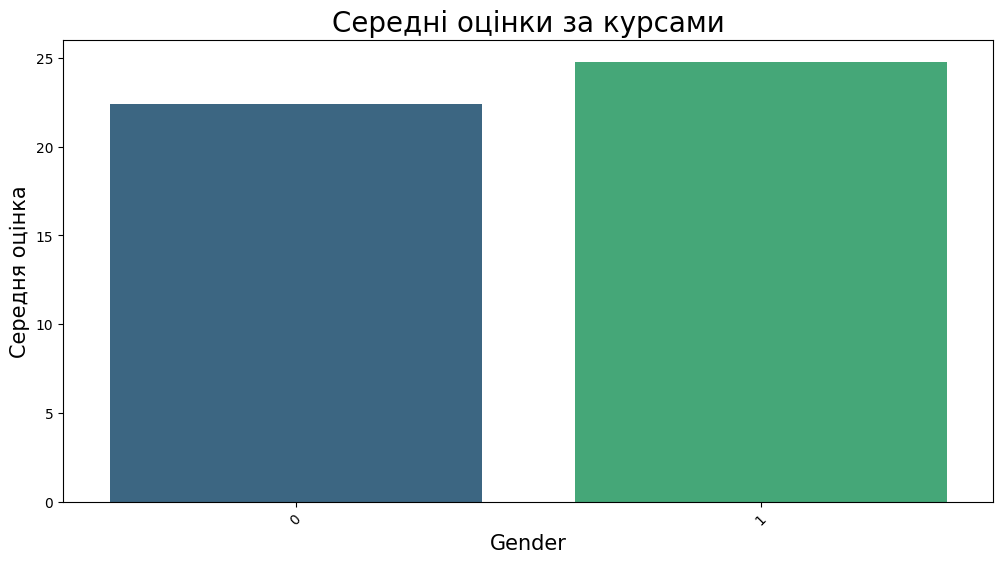

In [87]:
# Обчисліть середні оцінки за курсами
average_grades = ds.groupby('Gender')['Age at enrollment'].mean().reset_index()

# Відобразіть середні оцінки
plt.figure(figsize=(12, 6))
sns.barplot(data=average_grades, x='Gender', y='Age at enrollment', palette='viridis')
plt.title("Середні оцінки за курсами", fontsize=20)
plt.xlabel("Gender", fontsize=15)
plt.ylabel("Середня оцінка", fontsize=15)
plt.xticks(rotation=45)
plt.show()

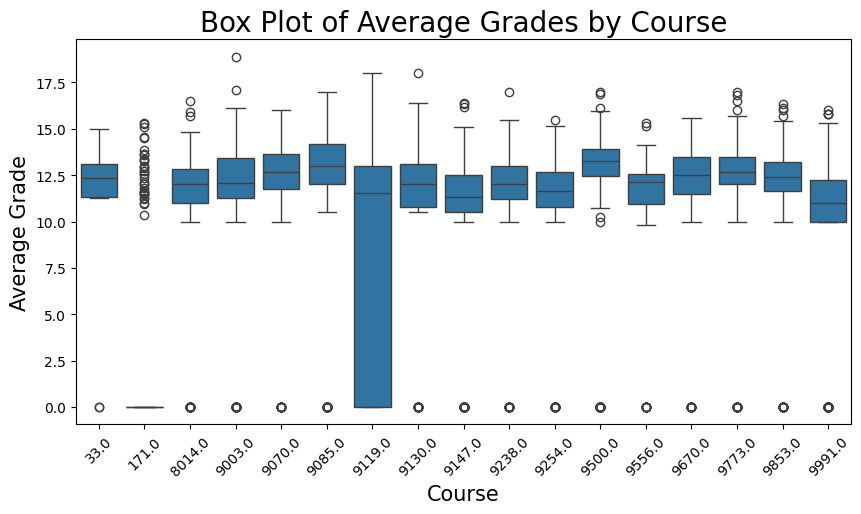

In [28]:
plt.figure()
sns.boxplot(x='Course', y='Curricular units 1st sem (grade)', data=ds)
plt.title("Box Plot of Average Grades by Course", fontsize=20)
plt.xlabel("Course", fontsize=15)
plt.ylabel("Average Grade", fontsize=15)
plt.xticks(rotation=45)
plt.show()


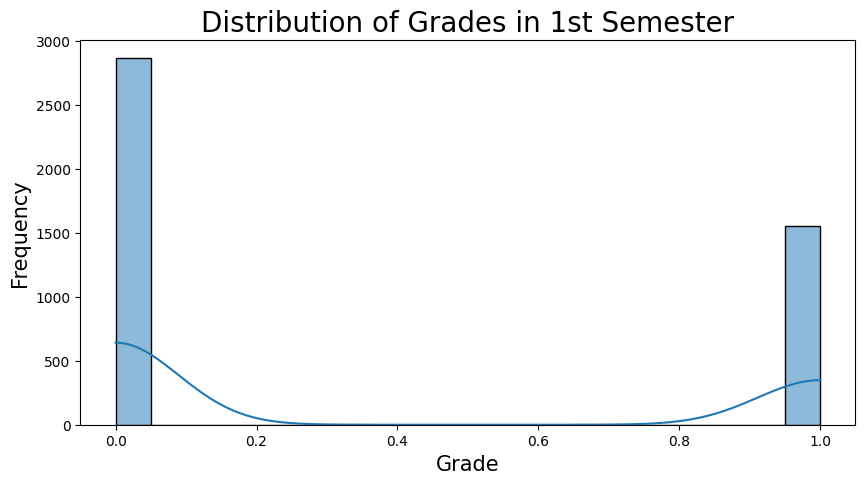

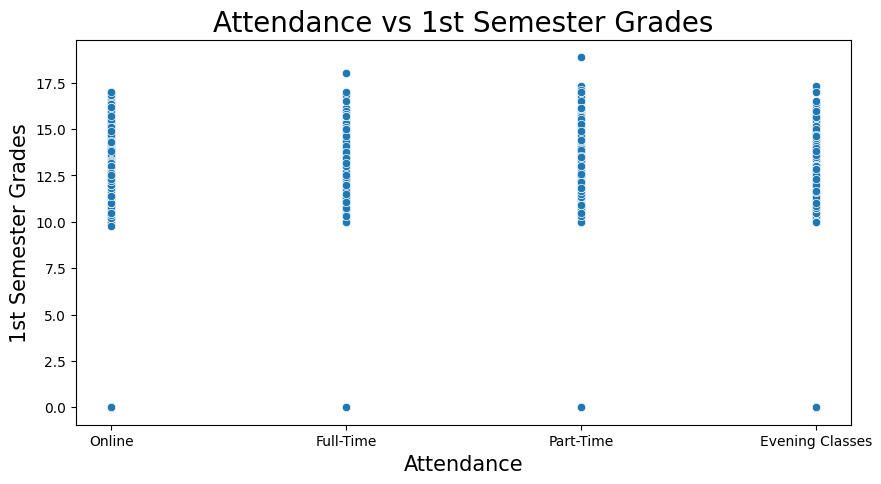

In [34]:
# 2. Діаграма розсіювання: Відвідуваність vs Оцінки 1-го семестру
plt.figure(figsize=(10, 5))
sns.scatterplot(x=ds['Attendance'], y=ds['Curricular units 1st sem (grade)'], palette="dark")
plt.title("Attendance vs 1st Semester Grades", fontsize=20)
plt.xlabel("Attendance", fontsize=15)
plt.ylabel("1st Semester Grades", fontsize=15)
plt.show()

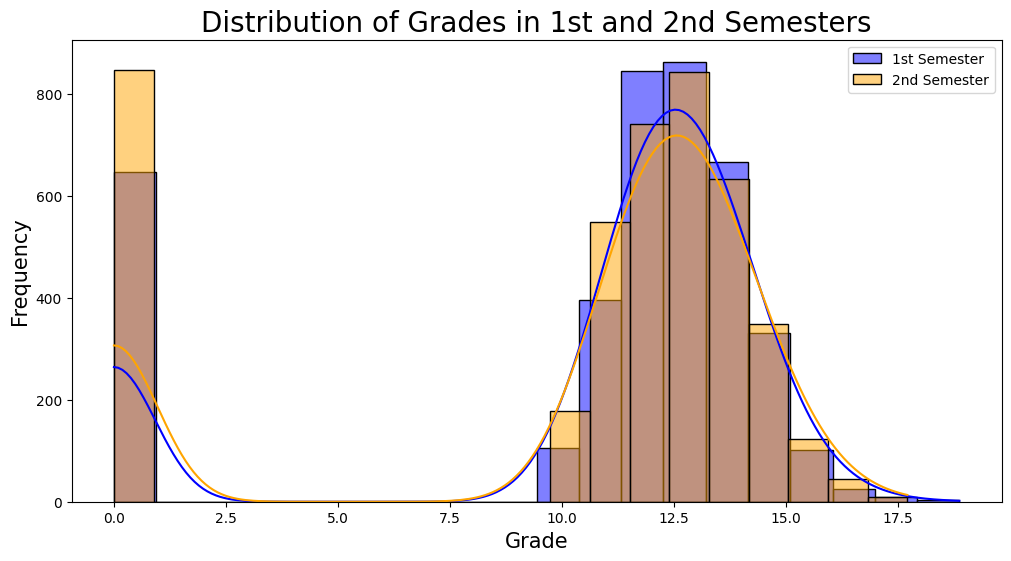

In [35]:
# Об'єднуємо оцінки за першими і другими семестрами
grades_first_sem = ds['Curricular units 1st sem (grade)']
grades_second_sem = ds['Curricular units 2nd sem (grade)']

# Визначаємо фігуру
plt.figure(figsize=(12, 6))

# Додаємо гістограму для оцінок 1-го семестру
sns.histplot(grades_first_sem, bins=20, kde=True, color='blue', label='1st Semester', alpha=0.5)

# Додаємо гістограму для оцінок 2-го семестру
sns.histplot(grades_second_sem, bins=20, kde=True, color='orange', label='2nd Semester', alpha=0.5)

# Налаштування заголовка та підписів
plt.title('Distribution of Grades in 1st and 2nd Semesters', fontsize=20)
plt.xlabel('Grade', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.legend()
plt.show()

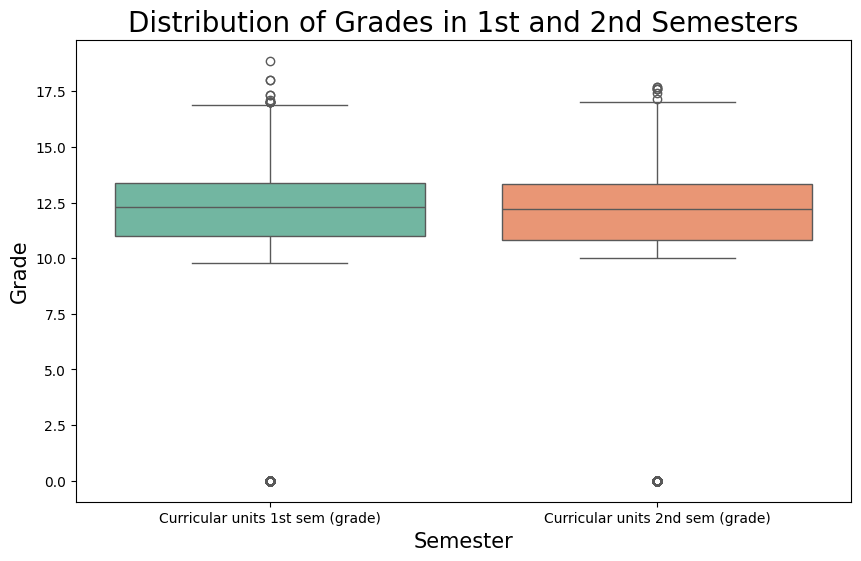

In [36]:

# Визначаємо фігуру
plt.figure(figsize=(10, 6))

# Об'єднуємо дані для ящикової діаграми
data = pd.melt(ds, value_vars=['Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)'],
                var_name='Semester', value_name='Grade')

# Створюємо ящикову діаграму
sns.boxplot(x='Semester', y='Grade', data=data, palette='Set2')

# Налаштування заголовка та підписів
plt.title('Distribution of Grades in 1st and 2nd Semesters', fontsize=20)
plt.xlabel('Semester', fontsize=15)
plt.ylabel('Grade', fontsize=15)
plt.show()

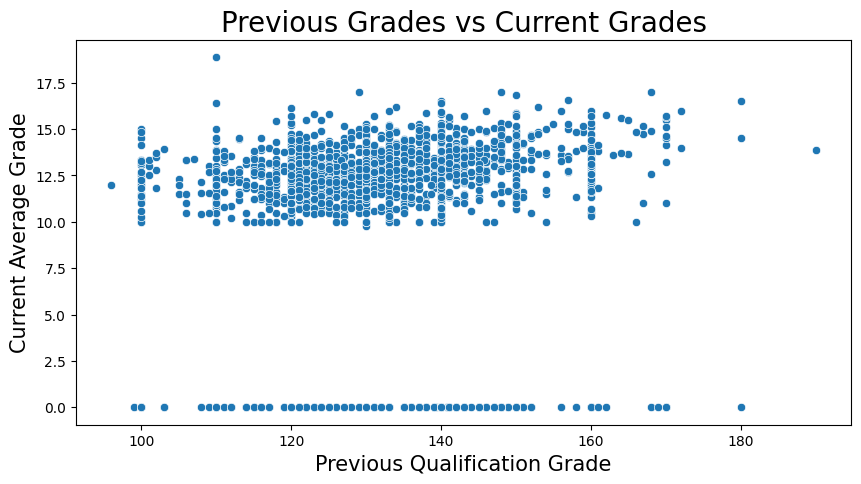

In [37]:
# 3. Діаграма розсіювання: Попередні оцінки vs Оцінки
plt.figure(figsize=(10, 5))
sns.scatterplot(x=ds['Previous qualification (grade)'], y=ds['Curricular units 1st sem (grade)'], palette="dark")
plt.title("Previous Grades vs Current Grades", fontsize=20)
plt.xlabel("Previous Qualification Grade", fontsize=15)
plt.ylabel("Current Average Grade", fontsize=15)
plt.show()

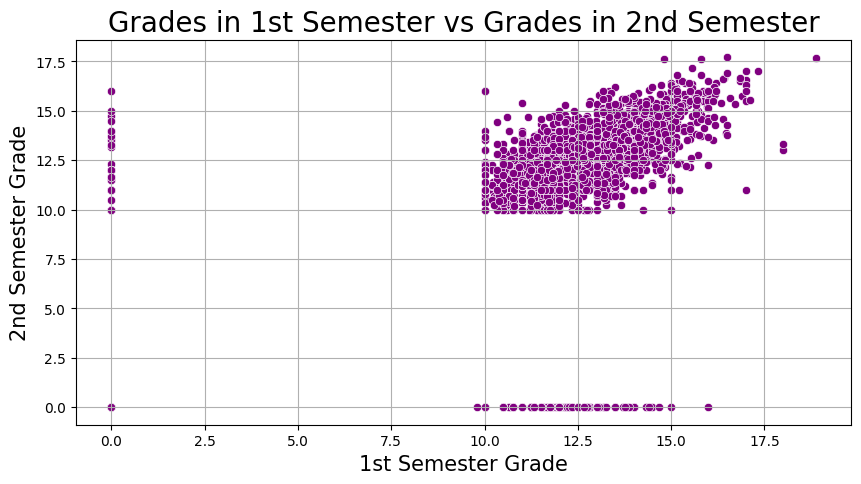

In [38]:

# Створюємо діаграму розсіювання для обох семестрів
sns.scatterplot(x=ds['Curricular units 1st sem (grade)'], y=ds['Curricular units 2nd sem (grade)'], color='purple')

# Налаштування заголовка та підписів
plt.title("Grades in 1st Semester vs Grades in 2nd Semester", fontsize=20)
plt.xlabel("1st Semester Grade", fontsize=15)
plt.ylabel("2nd Semester Grade", fontsize=15)
plt.grid(True)
plt.show()

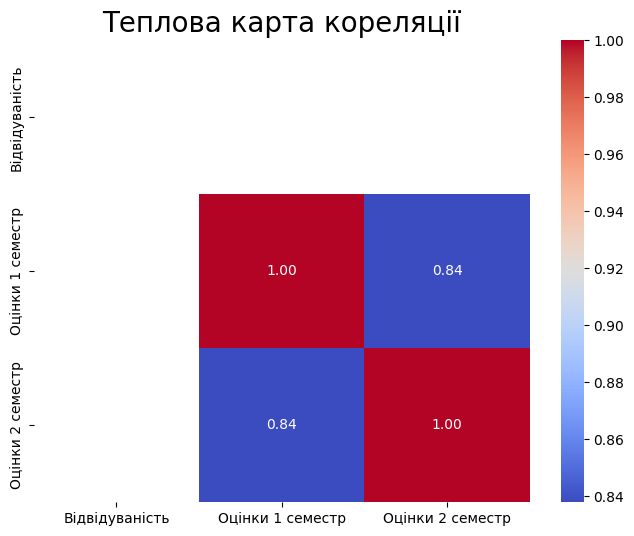

In [41]:

ds['Attendance'] = ds['Attendance'].replace({'Online': 1, 'Offline': 0})

# Переконайтеся, що всі значення в Attendance числові
ds['Attendance'] = pd.to_numeric(ds['Attendance'], errors='coerce')

# Обчислюємо матрицю кореляції
correlation_matrix = ds[['Attendance', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']].corr()

# Створюємо теплову карту
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", 
            xticklabels=['Відвідуваність', 'Оцінки 1 семестр', 'Оцінки 2 семестр'], 
            yticklabels=['Відвідуваність', 'Оцінки 1 семестр', 'Оцінки 2 семестр'])
plt.title("Теплова карта кореляції", fontsize=20)
plt.show()


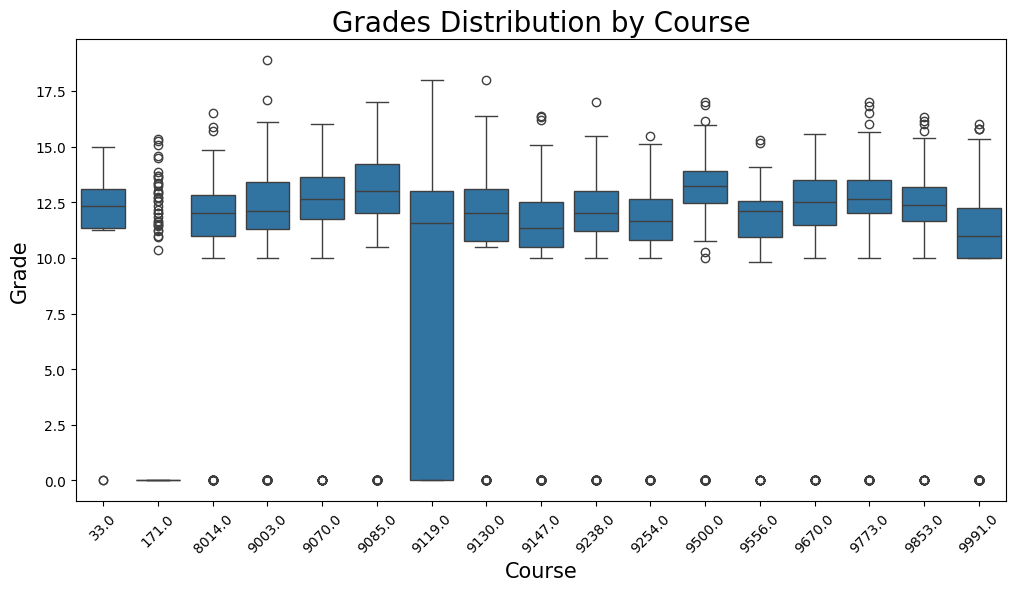

In [44]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Course', y='Curricular units 1st sem (grade)', data=ds)
plt.title("Grades Distribution by Course", fontsize=20)
plt.xlabel("Course", fontsize=15)
plt.ylabel("Grade", fontsize=15)
plt.xticks(rotation=45)
plt.show()


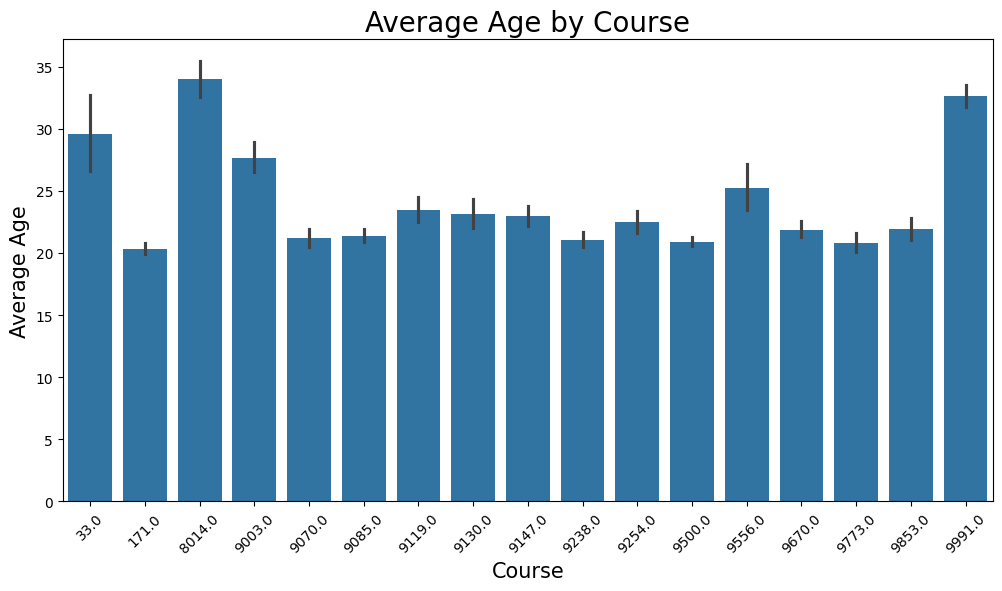

In [46]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Course', y='Age at enrollment', data=ds)
plt.title("Average Age by Course", fontsize=20)
plt.xlabel("Course", fontsize=15)
plt.ylabel("Average Age", fontsize=15)
plt.xticks(rotation=45)
plt.show()

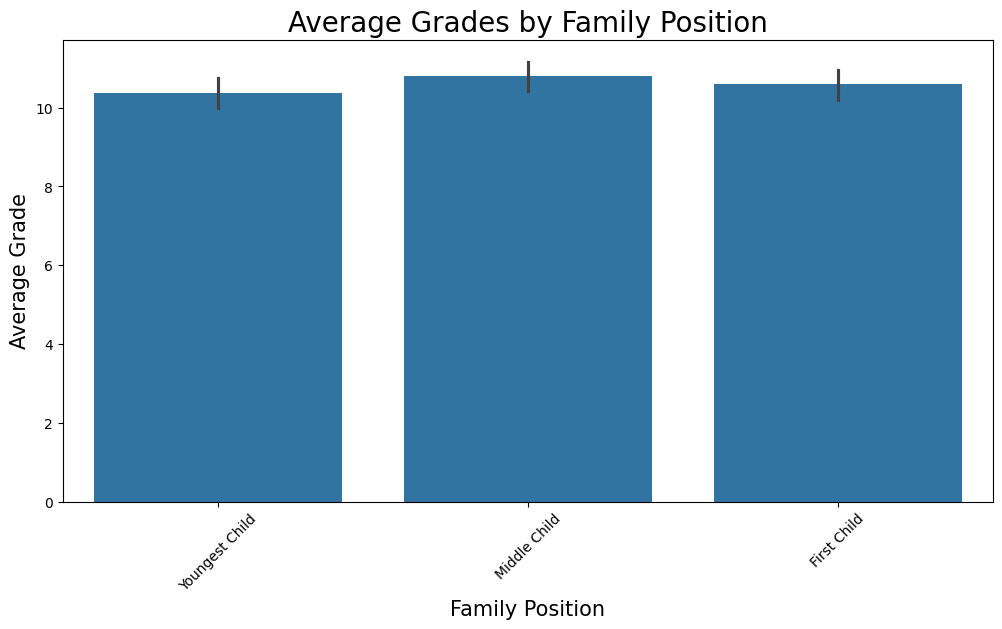

In [83]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Family Position', y='Curricular units 1st sem (grade)', data=ds)
plt.title("Average Grades by Family Position", fontsize=20)
plt.xlabel("Family Position", fontsize=15)
plt.ylabel("Average Grade", fontsize=15)
plt.xticks(rotation=45)
plt.show()

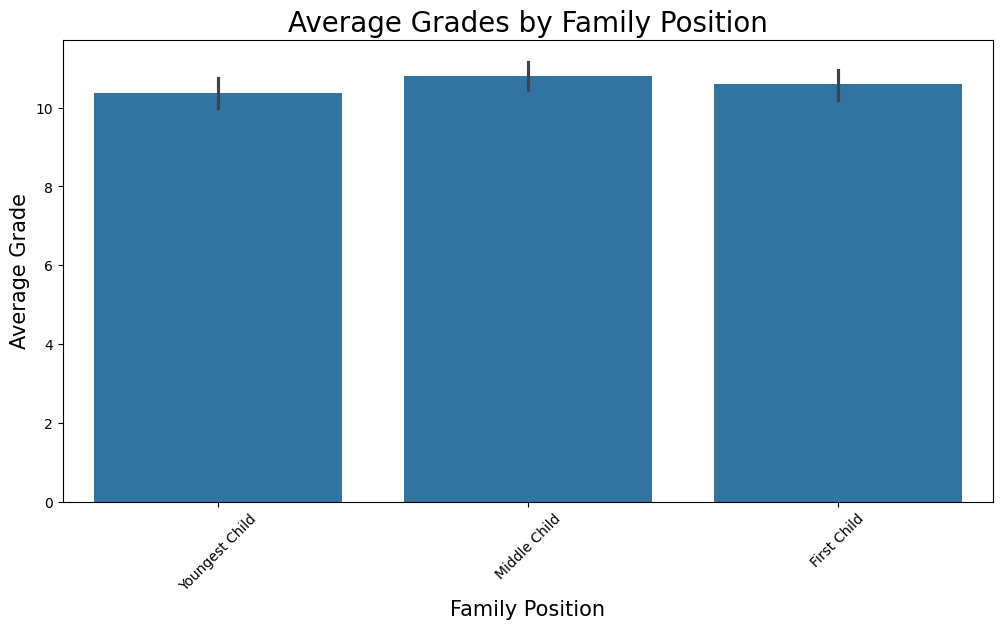

In [47]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Family Position', y='Curricular units 1st sem (grade)', data=ds)
plt.title("Average Grades by Family Position", fontsize=20)
plt.xlabel("Family Position", fontsize=15)
plt.ylabel("Average Grade", fontsize=15)
plt.xticks(rotation=45)
plt.show()

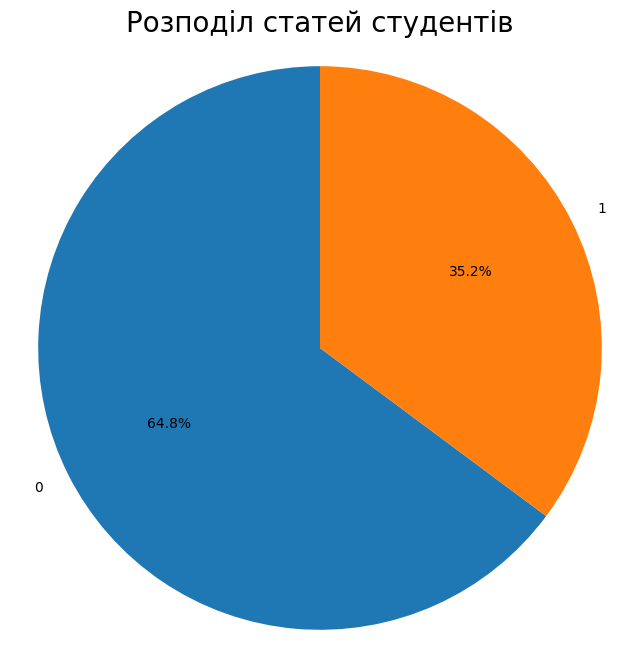

In [48]:
# Розподіл статей
gender_counts = ds['Gender'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Розподіл статей студентів", fontsize=20)
plt.axis('equal')  # Щоб діаграма була круглою
plt.show()

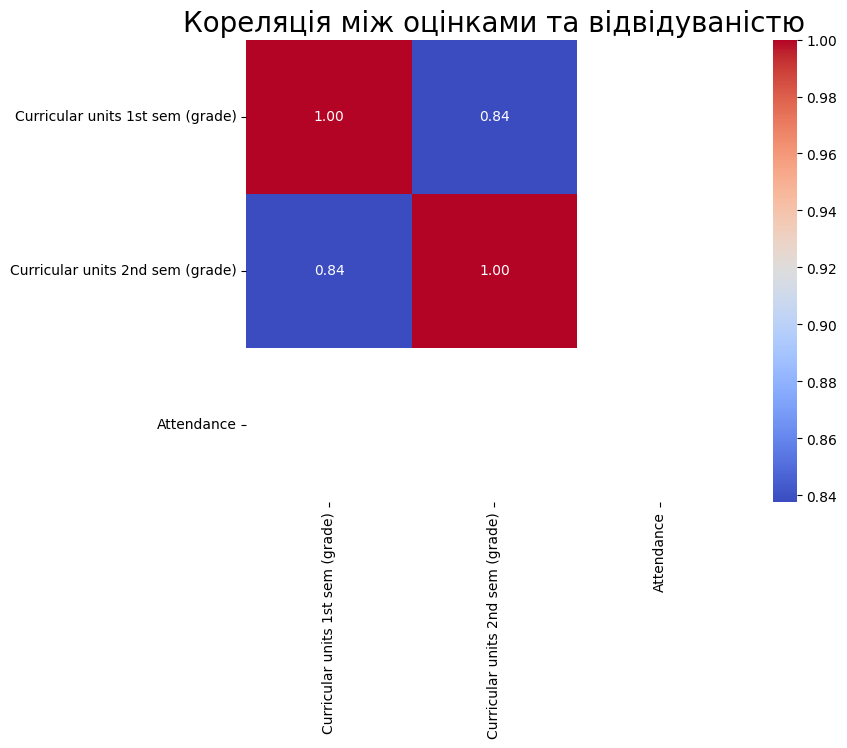

In [49]:

# Створіть матрицю кореляцій
correlation_matrix = ds[['Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)', 'Attendance']].corr()

# Створіть теплову карту
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Кореляція між оцінками та відвідуваністю", fontsize=20)
plt.show()

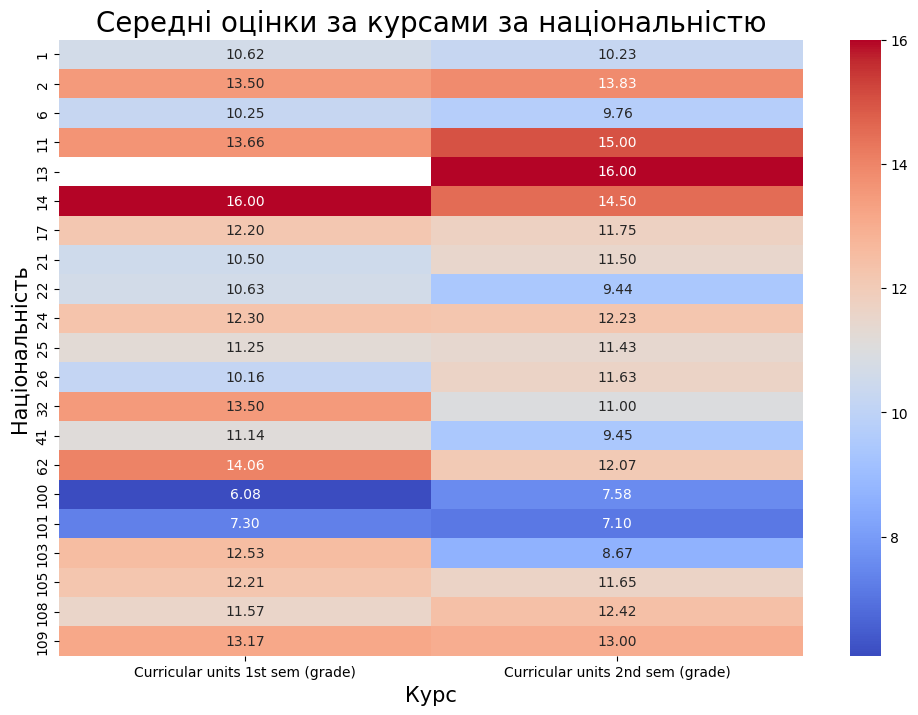

In [50]:


# Групування за національністю і курсами
mean_grades = ds.groupby('Nacionality')[['Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']].mean()

# Створіть теплову карту
plt.figure(figsize=(12, 8))
sns.heatmap(mean_grades, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Середні оцінки за курсами за національністю", fontsize=20)
plt.xlabel("Курс", fontsize=15)
plt.ylabel("Національність", fontsize=15)
plt.show()


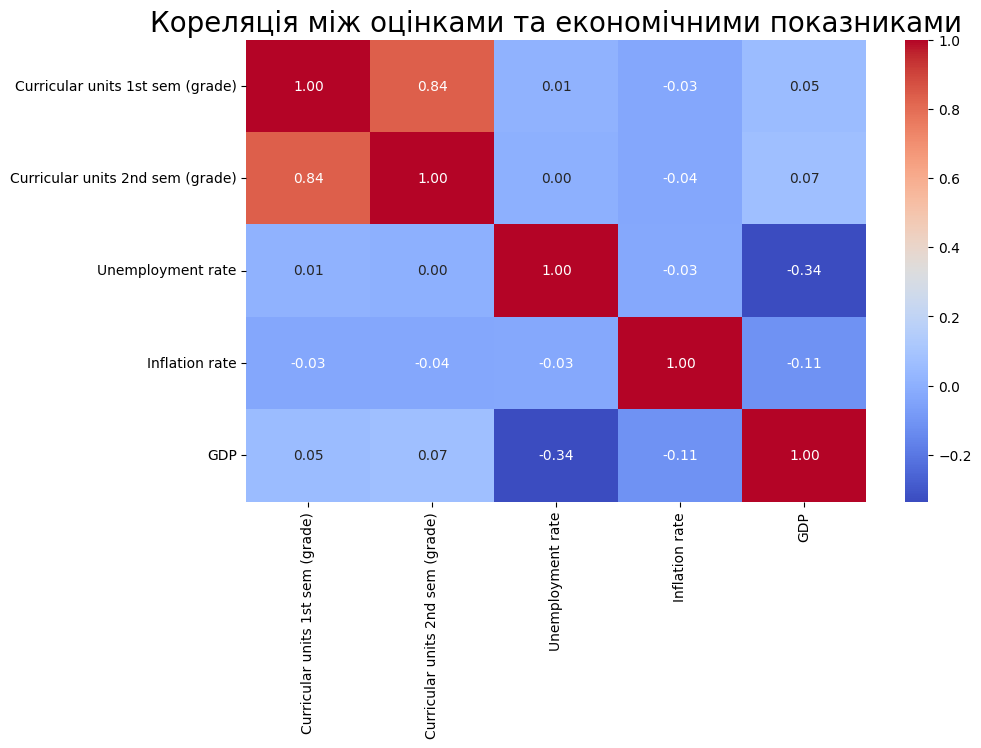

In [51]:
# Створіть матрицю кореляцій
correlation_matrix = ds[['Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)', 'Unemployment rate', 'Inflation rate', 'GDP']].corr()

# Створіть теплову карту
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Кореляція між оцінками та економічними показниками", fontsize=20)
plt.show()

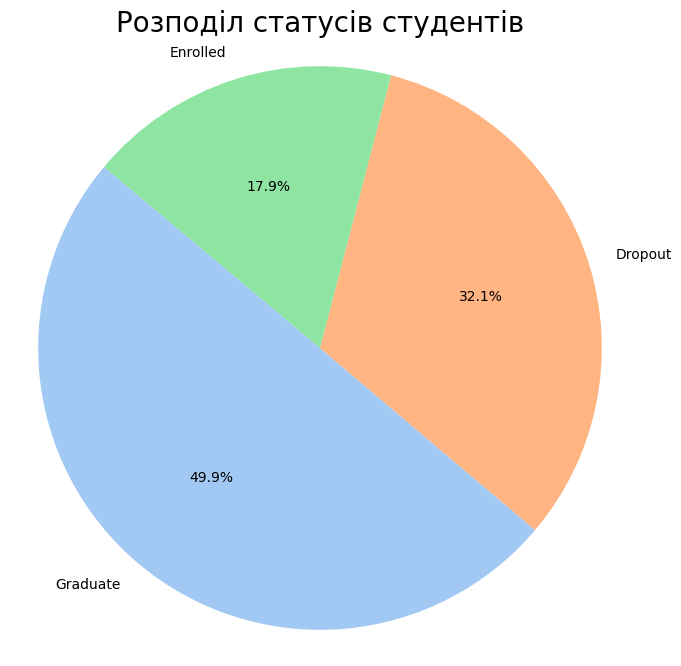

In [54]:


# Підрахунок кількості студентів за категоріями
status_counts = ds['Target'].value_counts()

# Створення кругової діаграми
plt.figure(figsize=(8, 8))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Розподіл статусів студентів', fontsize=20)
plt.axis('equal')  # Щоб кругова діаграма була круглою
plt.show()

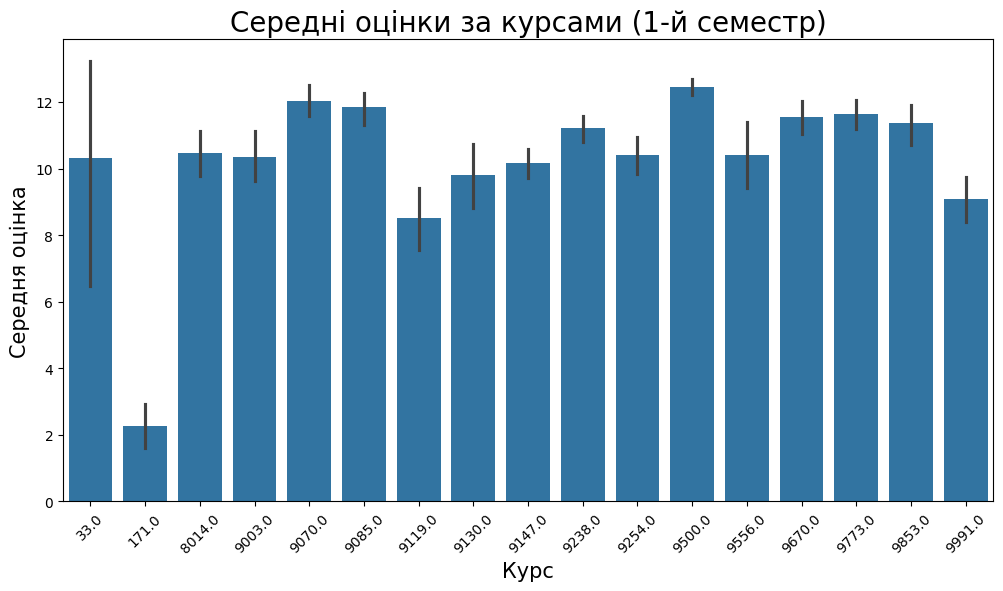

In [55]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Course', y='Curricular units 1st sem (grade)', data=ds, estimator=np.mean)
plt.title('Середні оцінки за курсами (1-й семестр)', fontsize=20)
plt.xlabel('Курс', fontsize=15)
plt.ylabel('Середня оцінка', fontsize=15)
plt.xticks(rotation=45)
plt.show()


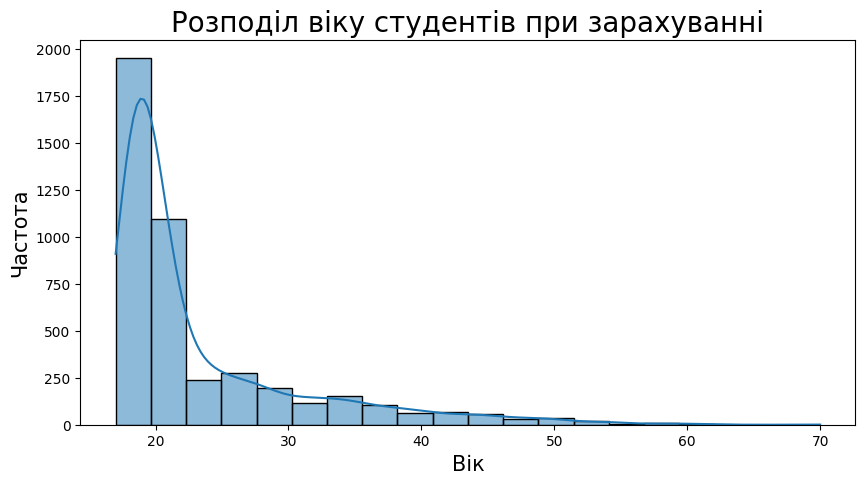

In [56]:
plt.figure(figsize=(10, 5))
sns.histplot(ds['Age at enrollment'], bins=20, kde=True)
plt.title('Розподіл віку студентів при зарахуванні', fontsize=20)
plt.xlabel('Вік', fontsize=15)
plt.ylabel('Частота', fontsize=15)
plt.show()


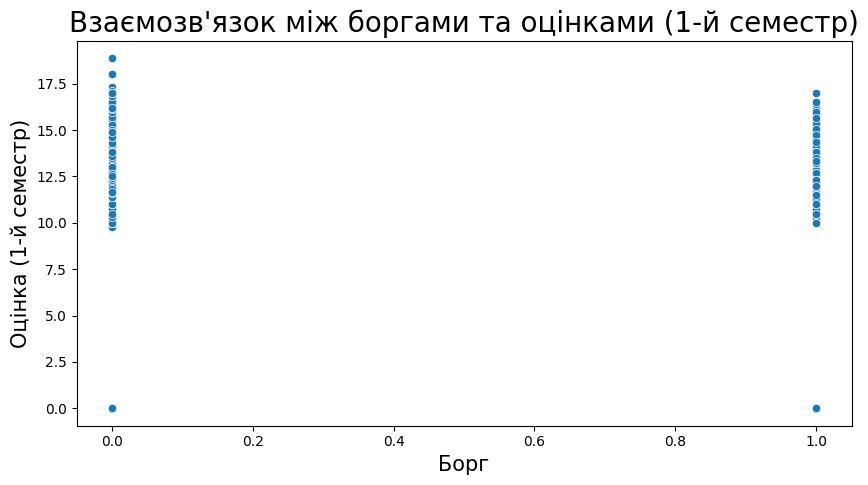

In [57]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Debtor', y='Curricular units 1st sem (grade)', data=ds)
plt.title('Взаємозв\'язок між боргами та оцінками (1-й семестр)', fontsize=20)
plt.xlabel('Борг', fontsize=15)
plt.ylabel('Оцінка (1-й семестр)', fontsize=15)
plt.show()


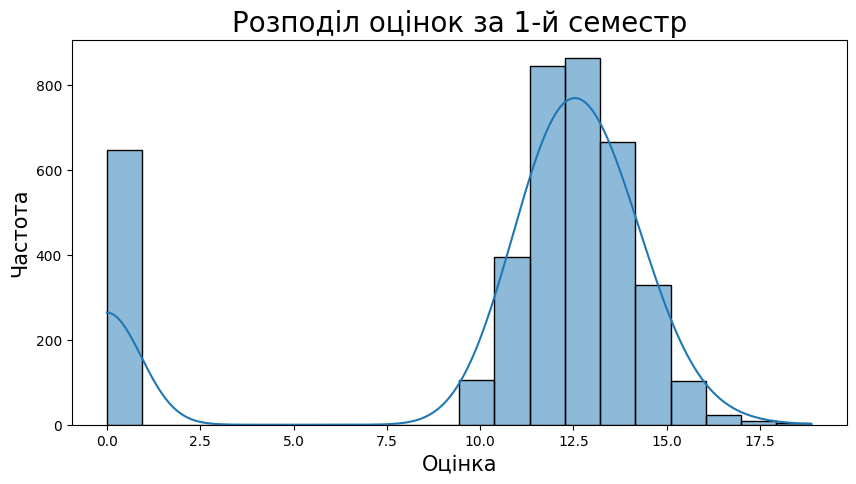

In [59]:
plt.figure(figsize=(10, 5))
sns.histplot(ds['Curricular units 1st sem (grade)'], bins=20, kde=True)
plt.title('Розподіл оцінок за 1-й семестр', fontsize=20)
plt.xlabel('Оцінка', fontsize=15)
plt.ylabel('Частота', fontsize=15)
plt.show()


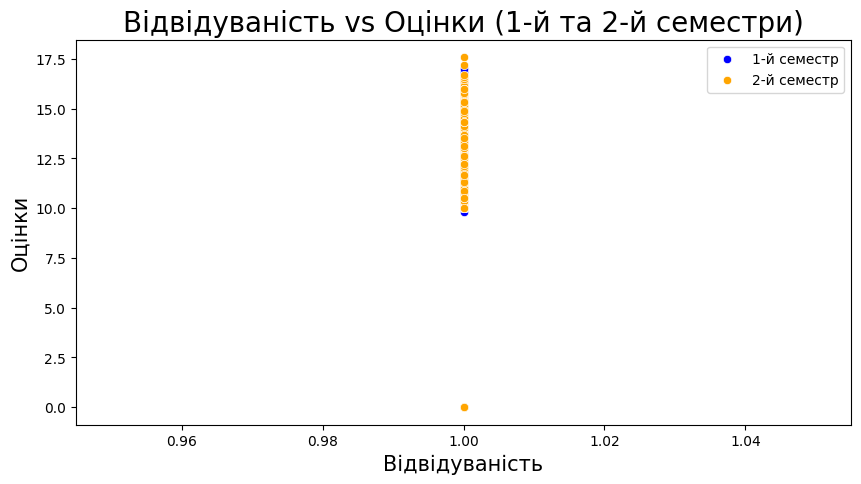

In [60]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=ds['Attendance'], y=ds['Curricular units 1st sem (grade)'], label='1-й семестр', color='blue')
sns.scatterplot(x=ds['Attendance'], y=ds['Curricular units 2nd sem (grade)'], label='2-й семестр', color='orange')
plt.title("Відвідуваність vs Оцінки (1-й та 2-й семестри)", fontsize=20)
plt.xlabel("Відвідуваність", fontsize=15)
plt.ylabel("Оцінки", fontsize=15)
plt.legend()
plt.show()


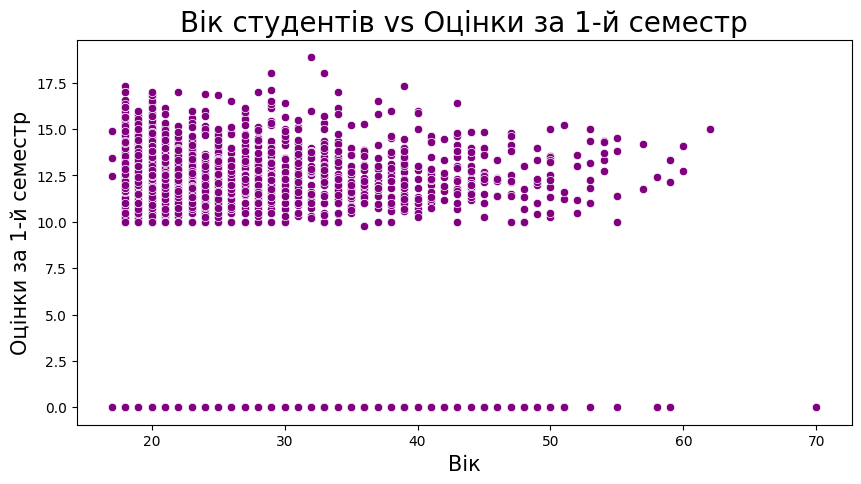

In [61]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=ds['Age at enrollment'], y=ds['Curricular units 1st sem (grade)'], color='purple')
plt.title("Вік студентів vs Оцінки за 1-й семестр", fontsize=20)
plt.xlabel("Вік", fontsize=15)
plt.ylabel("Оцінки за 1-й семестр", fontsize=15)
plt.show()


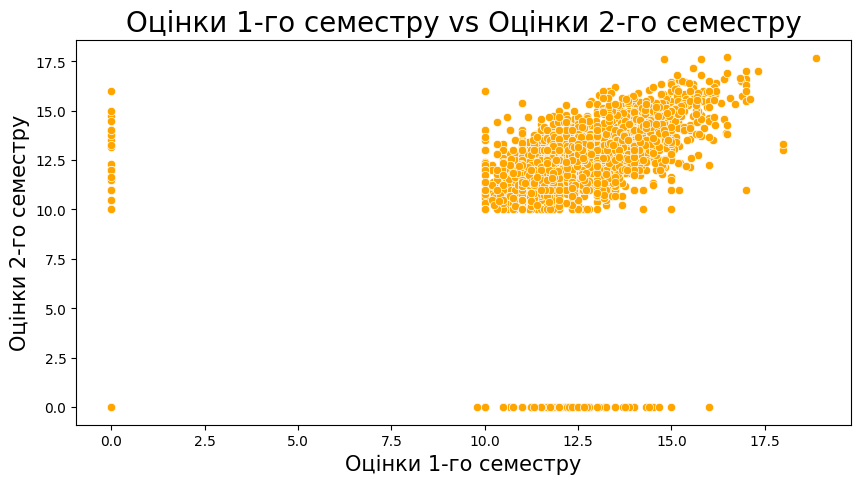

In [63]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=ds['Curricular units 1st sem (grade)'], y=ds['Curricular units 2nd sem (grade)'], color='orange')
plt.title("Оцінки 1-го семестру vs Оцінки 2-го семестру", fontsize=20)
plt.xlabel("Оцінки 1-го семестру", fontsize=15)
plt.ylabel("Оцінки 2-го семестру", fontsize=15)
plt.show()


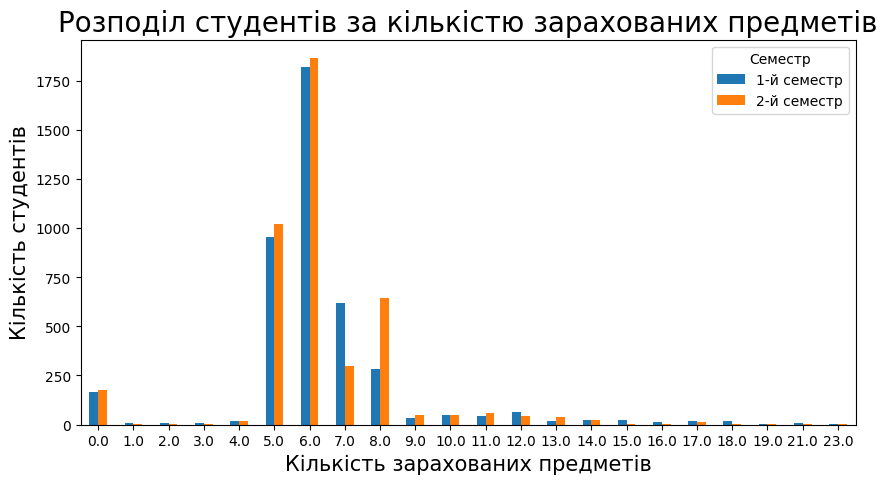

In [79]:
# Підрахунок кількості студентів за кожною категорією зарахованих предметів для обох семестрів
enrolled_counts_1st = ds['Curricular units 1st sem (enrolled)'].value_counts().sort_index()
enrolled_counts_2nd = ds['Curricular units 2nd sem (enrolled)'].value_counts().sort_index()

# Об'єднання даних у один DataFrame
enrolled_counts = pd.DataFrame({
    '1-й семестр': enrolled_counts_1st,
    '2-й семестр': enrolled_counts_2nd
}).fillna(0)

# Створення стовпчикової діаграми
enrolled_counts.plot(kind='bar', figsize=(10, 5), color=['#1f77b4', '#ff7f0e'])
plt.title("Розподіл студентів за кількістю зарахованих предметів", fontsize=20)
plt.xlabel("Кількість зарахованих предметів", fontsize=15)
plt.ylabel("Кількість студентів", fontsize=15)
plt.xticks(rotation=0)
plt.legend(title="Семестр")
plt.show()





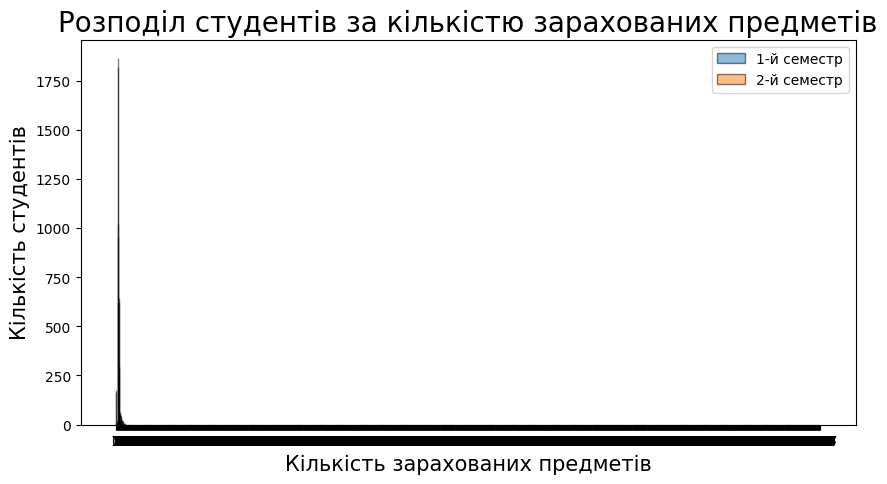

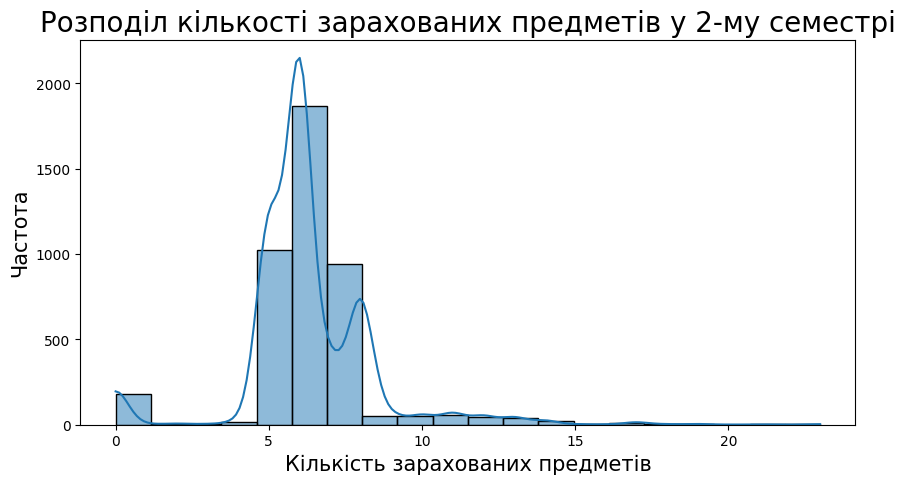

In [74]:
plt.figure(figsize=(10, 5))
sns.histplot(ds['Curricular units 2nd sem (enrolled)'], bins=20, kde=True)
plt.title('Розподіл кількості зарахованих предметів у 2-му семестрі', fontsize=20)
plt.xlabel('Кількість зарахованих предметів', fontsize=15)
plt.ylabel('Частота', fontsize=15)
plt.show()



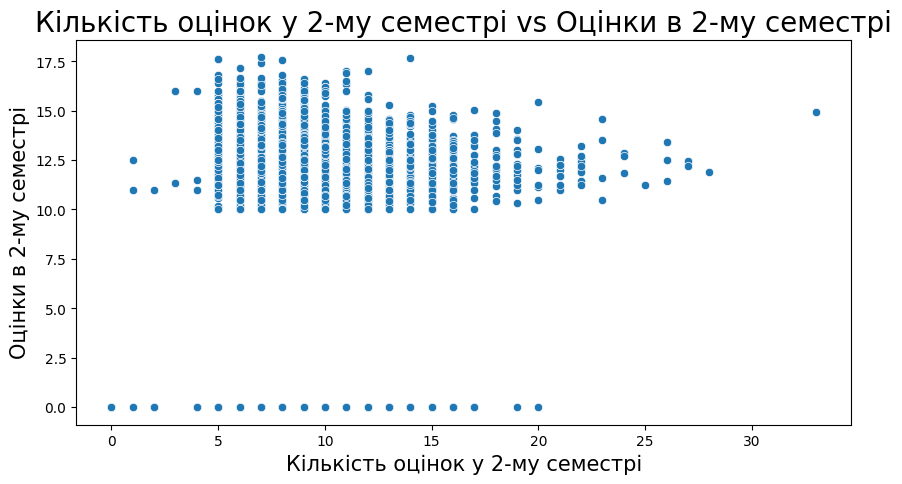

In [73]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=ds['Curricular units 2nd sem (evaluations)'], y=ds['Curricular units 2nd sem (grade)'])
plt.title("Кількість оцінок у 2-му семестрі vs Оцінки в 2-му семестрі", fontsize=20)
plt.xlabel("Кількість оцінок у 2-му семестрі", fontsize=15)
plt.ylabel("Оцінки в 2-му семестрі", fontsize=15)
plt.show()



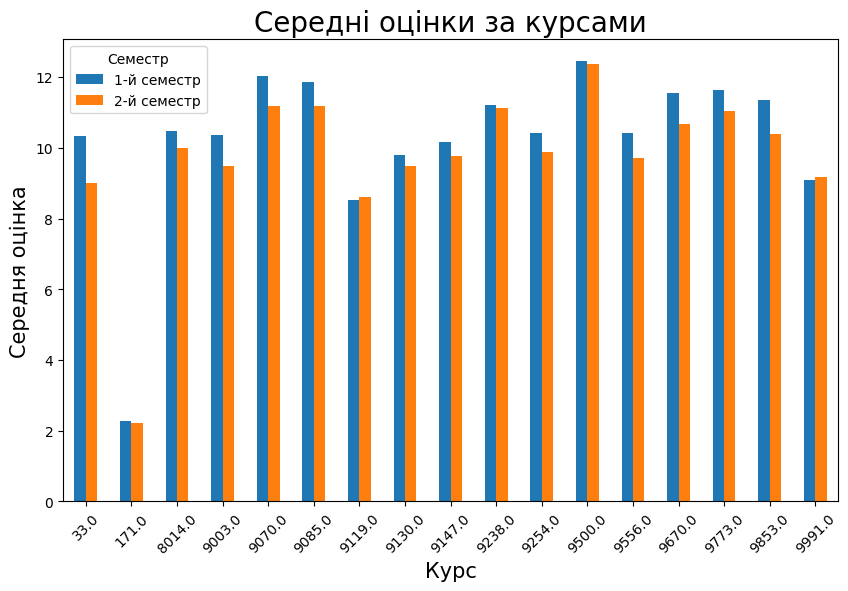

In [70]:
ds.groupby('Course').agg({
    'Curricular units 1st sem (grade)': 'mean',
    'Curricular units 2nd sem (grade)': 'mean'
}).plot(kind='bar', figsize=(10, 6))
plt.title("Середні оцінки за курсами", fontsize=20)
plt.xlabel("Курс", fontsize=15)
plt.ylabel("Середня оцінка", fontsize=15)
plt.xticks(rotation=45)
plt.legend(title="Семестр", labels=['1-й семестр', '2-й семестр'])
plt.show()



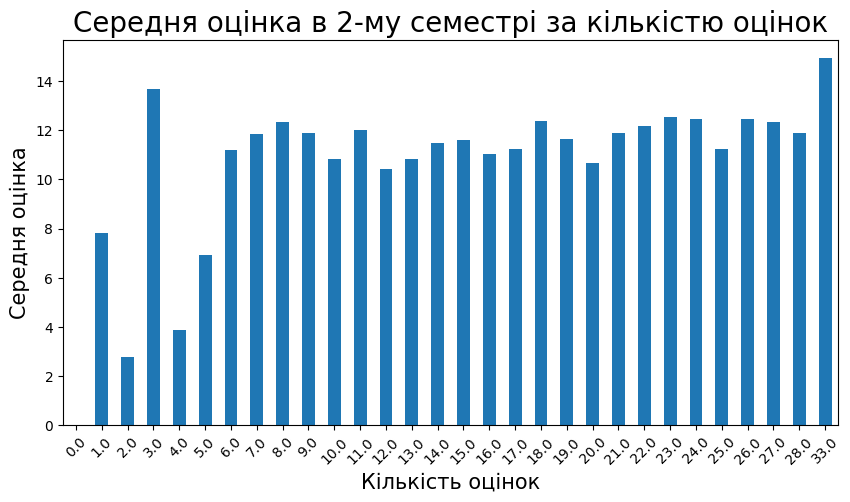

In [72]:
average_grades = ds.groupby('Curricular units 2nd sem (evaluations)')['Curricular units 2nd sem (grade)'].mean()
plt.figure(figsize=(10, 5))
average_grades.plot(kind='bar')
plt.title("Середня оцінка в 2-му семестрі за кількістю оцінок", fontsize=20)
plt.xlabel("Кількість оцінок", fontsize=15)
plt.ylabel("Середня оцінка", fontsize=15)
plt.xticks(rotation=45)
plt.show()



In [1]:
# Прохід по кожній колонці в DataFrame та виведення унікальних значень
for column in ds.columns:
    unique_values = ds[column].unique()
    print(f"Колонка '{column}' має {len(unique_values)} унікальних значень:")
    print(unique_values)
    print("-" * 50)


NameError: name 'ds' is not defined

In [2]:
# Виведення унікальних значень для колонок, що містять оцінки
grade_columns = [
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (grade)',
    'Admission grade'
]

for column in grade_columns:
    unique_values = ds[column].unique()
    print(f"Колонка '{column}' має {len(unique_values)} унікальних значень:")
    print(unique_values)
    print("-" * 50)


NameError: name 'ds' is not defined